## Les dépendances :

In [32]:
import numpy as np
import pandas as pd
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
!python -m spacy download en_core_web_md
import spacy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
nltk.download('punkt')
from spacy.lang.en import STOP_WORDS
from nltk.corpus import wordnet
import spacy
from spacy.lang.en import STOP_WORDS
from transformers import pipeline
nltk.download('wordnet')
import time


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


2023-11-29 23:36:19.401382: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-29 23:36:19.401475: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-29 23:36:19.401556: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-29 23:36:20.866204: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 17.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [33]:
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting=3)


Epoch 1/10
23/23 [==============================] - 2s 25ms/step - loss: 0.6768 - accuracy: 0.6472 - val_loss: 0.4883 - val_accuracy: 0.7375
Epoch 2/10
23/23 [==============================] - 0s 6ms/step - loss: 0.4715 - accuracy: 0.7583 - val_loss: 0.4141 - val_accuracy: 0.7875
Epoch 3/10
23/23 [==============================] - 0s 6ms/step - loss: 0.4150 - accuracy: 0.8083 - val_loss: 0.3736 - val_accuracy: 0.8625
Epoch 4/10
23/23 [==============================] - 0s 7ms/step - loss: 0.3581 - accuracy: 0.8347 - val_loss: 0.4390 - val_accuracy: 0.7875
Epoch 5/10
23/23 [==============================] - 0s 7ms/step - loss: 0.3572 - accuracy: 0.8292 - val_loss: 0.4368 - val_accuracy: 0.7875
Epoch 6/10
23/23 [==============================] - 0s 9ms/step - loss: 0.2963 - accuracy: 0.8889 - val_loss: 0.3987 - val_accuracy: 0.8125
Epoch 7/10
23/23 [==============================] - 0s 7ms/step - loss: 0.2750 - accuracy: 0.9014 - val_loss: 0.3425 - val_accuracy: 0.8500
Epoch 8/10
23/23 [=

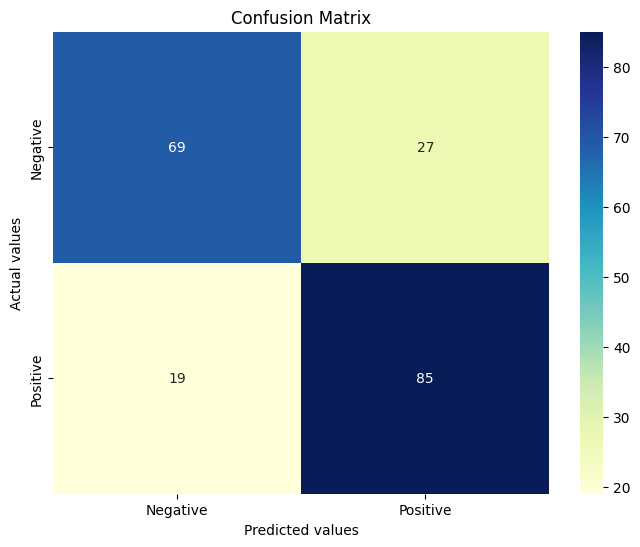

In [34]:

# Charger le modèle spaCy avec embeddings de mots en anglais
nlp = spacy.load('en_core_web_md')

# Charger les données
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

def preprocess_text(text):
    doc = nlp(text)
    return np.mean([token.vector for token in doc], axis=0)

df['processed_review'] = df['Review'].apply(preprocess_text)

# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(np.vstack(df['processed_review']), df['Liked'], test_size=0.2, random_state=42)

# Encoder les labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Construire le modèle
model = Sequential()
model.add(Dense(128, input_dim=300, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraîner le modèle
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.1)

# Prédiction sur l'ensemble de test
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Évaluer le modèle
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred)
recall = recall_score(y_test_encoded, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Afficher la matrice de confusion
cm = confusion_matrix(y_test_encoded, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='g', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix')
plt.show()




In [35]:
#  Fonction pour prédire la polarité d'un nouvel avis
def predict_polarity(new_review, threshold=0.5):

    processed_new_review = preprocess_text(new_review)

    # Effectuer la prédiction avec le modèle
    new_review_embedding = processed_new_review.reshape(1, -1)
    prediction_prob = model.predict(new_review_embedding)[0, 0]

    # Utiliser un seuil pour décider de la classe prédite
    predicted_label = 1 if prediction_prob >= threshold else 0

    return prediction_prob, predicted_label


Exemple de prédiction avec la fonction predict_polarity

In [36]:
new_review = "the food is very good. "

prob, label = predict_polarity(new_review)

# Afficher la prédiction
print("Probabilité de polarité positive:", prob)
print("Polarité prédite:", label)


1/1 [==============================] - 0s 38ms/step
Probabilité de polarité positive: 0.8942814
Polarité prédite: 1


La fonction predict_polarity_per_sentence permet de diviser un avis en des phrases et prédit la polarité totale de l'avis de la manière suivante:
si l'une des phrases a une polarité négative, tout l'avis est considéré comme négatif.
Si toutes les phrases sont positives, l'avis est considéré comme positif.
On a fait ce choix car la prédiction de la polarité a pour but de générer une réponse convenable à l'avis et si ça contient un commentaire négatif, la logique dit qu'on va répondre juste sur ce qui est négatif et le positif devient négligeable.


In [37]:

# Fonction pour diviser un avis en phrases et prédire la polarité de chaque phrase
def predict_polarity_per_sentence(review, threshold=0.5):
    # Utiliser la segmentation en phrases de nltk
    sentences = nltk.sent_tokenize(review)

    # Stocker les polarités prédites pour chaque phrase
    polarities = []

    # Stocker les phrases avec polarité négative
    negative_sentences = []
    positive_sentences=[]
    for sentence in sentences:

        # Exemple de prédiction (à remplacer par votre fonction)
        prob, label = predict_polarity(sentence)
        print (label)
        print(sentence)
        # Stocker la polarité prédite
        polarities.append(label)

        # Stocker la phrase si la polarité est négative
        if label == 0:
            negative_sentences.append(sentence)
        else:
            positive_sentences.append(sentence)
    # Retourner la polarité totale et les phrases avec polarité négative
    total_polarity = "negative" if 0 in polarities else "positive"
    return total_polarity, negative_sentences,positive_sentences



Exemples d'utilisation de la fonction predict_polarity_per_sentence

In [38]:
# Exemple d'utilisation
example_review = "the food was bad. the jenkins were nice and friendly"
total_polarity,negative_sentences,positive_sentences = predict_polarity_per_sentence(example_review)

# Afficher la polarité totale prédite pour l'avis
print(f"Polarité totale de l'avis: {total_polarity}")
print(negative_sentences)


1/1 [==============================] - 0s 43ms/step
0
the food was bad.
1/1 [==============================] - 0s 37ms/step
1
the jenkins were nice and friendly
Polarité totale de l'avis: negative
['the food was bad.']


In [39]:
revieew="the food was good. the waiters wer polite."
total_polarity,negative_sentences,positive_sentences = predict_polarity_per_sentence(revieew)
print(f"Polarité totale de l'avis: {total_polarity}")



1/1 [==============================] - 0s 30ms/step
0
the food was good.
1/1 [==============================] - 0s 35ms/step
0
the waiters wer polite.
Polarité totale de l'avis: negative


Fonction qui permet d'extraire les mots clés à partir d'un avis.

In [40]:

def keyword_extractor(avis):
    # Load the spaCy English model
    nlp = spacy.load("en_core_web_sm")

    # Process the text with spaCy
    doc = nlp(avis)

    # Extract lemmatized words excluding stop words
    keywords = [token.lemma_ for token in doc if token.text.lower() not in STOP_WORDS and token.text.lower() not in ' ']

    # Display the extracted keywords
    return keywords



In [41]:
key_words=keyword_extractor(" the dishes was good")
print(key_words)

['dish', 'good']


Fonction qui donne les synonymes d'un mot
On en aura besoin car on veut comparer les mots clés de l'avis et leurs synonymes aux mots clés des catégories

In [42]:

#Fonction utilisant wordnet pour avoir les synonymes d'un mot
def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name())
    return list(synonyms)


word = "bad"
synonyms = get_synonyms(word)
print(f"Synonyms for {word}: {synonyms}")


Synonyms for bad: ['risky', 'regretful', 'unfit', 'badly', 'unsound', 'forged', 'speculative', 'uncollectible', 'defective', 'spoilt', 'sorry', 'badness', 'big', 'bad', 'high-risk', 'tough', 'spoiled']


In [43]:


# Fonction pour extraire les mots-clés et leurs synonymes d'un avis
def extract_keywords_with_synonyms(review):
    keywords = keyword_extractor(review)
    keywords_with_synonyms = []

    for keyword in keywords:
        # Ajouter le mot-clé lui-même
        keyword_with_synonyms = [keyword]

        # Ajouter les synonymes du mot-clé
        synonyms = get_synonyms(keyword)
        keyword_with_synonyms += synonyms

        # Ajouter à la liste des mots-clés avec synonymes
        keywords_with_synonyms += keyword_with_synonyms

    return keywords_with_synonyms

# Exemple d'utilisation
review = "The food was delicious, and the service was excellent."
result = extract_keywords_with_synonyms(review)
print(result)


['food', 'nutrient', 'solid_food', 'intellectual_nourishment', 'food_for_thought', 'food', 'delicious', 'pleasant-tasting', 'luscious', 'toothsome', 'Delicious', 'yummy', 'scrumptious', 'delicious', 'delectable', 'delightful', ',', 'service', 'religious_service', 'Robert_William_Service', 'inspection_and_repair', 'serving', 'service', 'armed_service', 'service_of_process', 'table_service', 'servicing', 'divine_service', 'military_service', 'help', 'serve', 'avail', 'Service', 'overhaul', 'excellent', 'fantabulous', 'first-class', 'splendid', 'excellent', '.']


On a 6 catégories possibles qui peuvent etre accordés à un avis.
Chaque catégorie a ses propres mots clés. ( une liste qui n'est pas prédéfinie, je l'ai définie et elle doit etre développée de plus pour couvrir plus de mots)

In [44]:
categories_keywords = {
        'Food': ['food', 'meal', 'dish', 'cuisine', 'flavor','cake','dessert','appetizer','beverage','pizza','pasta'],
        'Service': ['service', 'waiter', 'staff', 'friendly','attitude','hospitality',''],
        'Ambiance': ['ambiance', 'atmosphere', 'decor', 'music','setting','lighting',],
        'Price/Quality': ['price', 'value', 'money','affordability','cost'],
        'Overall Experience': ['experience', 'overall','dining','everything','nothing'],
        'Cleanliness': ['cleanliness', 'hygiene','tidiness','sanitation','neatness']
    }


Fonction permettant de trouver la catégorie d'un avis. ceci est réalisé par la mesure de similarité entre les mots clés de l'avis et leurs synonymes et les mots clés des catégories.

In [45]:
def find_category(review):
    # Load the spaCy English model
    keywords_synonyms=[]
    keywords=keyword_extractor(review)
    nlp = spacy.load("en_core_web_sm")

    # Initialize variables for tracking maximum similarity and corresponding category
    max_similarity = 0
    best_category = None
    #create synonyms for keyword of the review
    for keyword in keywords:
        synonyms=get_synonyms(keyword)
        keywords_synonyms.append(synonyms)
    # Iterate through categories and calculate similarity
    for category, category_keywords in categories_keywords.items():
        # Calculate similarity using Jaccard similarity coefficient
        similarity = len(set(keywords) & set(category_keywords)) / len(set(keywords) | set(category_keywords))

        # Update max_similarity and best_category if the current category has higher similarity
        if similarity > max_similarity:
            max_similarity = similarity
            best_category = category
    if (best_category == None):
        best_category='Overall Experience'

    return best_category



In [46]:
category = find_category("everything was bad")
print(f"The category for the review is: {category}")


The category for the review is: Overall Experience


In [47]:
#another way to determine polarity of review
#from transformers import pipeline
#sentiment_pipeline = pipeline("sentiment-analysis")
#data = [" the jenkins were nice", "the food was horrible"]
#sentiment_pipeline(data)



Fonction permettant l'extraction du sentiment à partir d'un avis

In [48]:
def feeling(review):
    classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)
    result=classifier(review)
    max_score_label = max(result[0], key=lambda x: x['score'])['label']
    max_score = max(result[0], key=lambda x: x['score'])['score']
    return (max_score_label)



In [49]:
sentiment=feeling("i am disgusted with the food eu3")
print(sentiment)

disgust


/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


# Notre pipeline


In [50]:
def review_analysis_pipeline(review):
    response=''
    total_polarity, negative_sentences, positive_sentences = predict_polarity_per_sentence(review)
    if total_polarity == "positive":
        feel=feeling(review)
        categories=[]
        for sentence in positive_sentences:
            category=find_category(sentence)
            categories.append(category)
        if len(categories) == 1 :
            if categories[0] == "Food":
                response="Thank you for your positive review! Your "+feel+" matters! We are happy that you enjoyed our food!Looking forward to serving you again."
            if categories[0] =="Service":
                response="Thank you for your positive review! Thank you for your kind words about our service! We appreciate your positive feedback and your "+feel+" does really matter! We look forward to serving you again"
            if categories[0] =="Ambiance":
                response="Thank you for your positive review! We're thrilled you loved the ambiance! Your "+feel+" means a lot to us. Looking forward to your next visit."
            if categories[0] =="Price/Quality":
                response="Hello and thank you for your positive feedback on the value we provide! We're delighted to hear you found our offerings worth the price. Your "+ feel+" is our priority, and we can't wait to welcome you back for another great experience."
            if categories[0] =="Overall Experience":
                response="Hello! We're thrilled to hear you had a positive overall experience with us. Your "+feel+" is our priority, and we can't wait to welcome you back for another great visit. Thank you for your kind words!"
            if categories[0]=="Cleanliness":
                response="Hello and thank you for your positive feedback on the cleanliness of our establishment! "
        elif len(categories) == 2 :
            response="Thank you for your positive review! We're delighted that you appreciated our "+categories[0]+" and "+categories[1]+ ". Looking forward to serving you again."

    elif total_polarity =="negative":
        feel=feeling(review)
        categories=[]
        for sentence in negative_sentences:
            category=find_category(sentence)
            categories.append(category)
        if len(categories) == 1 :

            response="Greetings! We're sorry to hear about your experience with our "+categories[0]+" Your feedback is valuable, and we'd like to address any concerns you have. Please let us know how we can enhance your experience next time."
        elif len(categories) == 2:
            response="Greetings! We are sorry to hear about your experience with our "+categories[0]+" and "+categories[1]+" Your feedback is valuable, and we'd like to address any concerns you have. Please let us know how we can enhance your experience next time."


    return response



In [51]:
# Exemple d'utilisation du pipeline avec un avis
example_review = "The service was excellent"
response = review_analysis_pipeline(example_review)
print(response)


1/1 [==============================] - 0s 46ms/step
1
The service was excellent
Thank you for your positive review! Thank you for your kind words about our service! We appreciate your positive feedback and your joy does really matter! We look forward to serving you again


In [52]:
example_review = "The food was horrible"
response = review_analysis_pipeline(example_review)
print(response)


1/1 [==============================] - 0s 37ms/step
0
The food was horrible
Greetings! We're sorry to hear about your experience with our Food Your feedback is valuable, and we'd like to address any concerns you have. Please let us know how we can enhance your experience next time.


In [53]:
example_review = "The food was horrible. the waiters were so impolite."
response = review_analysis_pipeline(example_review)
print(response)


1/1 [==============================] - 0s 39ms/step
0
The food was horrible.
1/1 [==============================] - 0s 71ms/step
0
the waiters were so impolite.
Greetings! We are sorry to hear about your experience with our Food and Service Your feedback is valuable, and we'd like to address any concerns you have. Please let us know how we can enhance your experience next time.


In [54]:
exemple_review="The food was very tasting. The waiters were very polite and kind!"
response = review_analysis_pipeline(exemple_review)
print(response)


1/1 [==============================] - 0s 57ms/step
0
The food was very tasting.
1/1 [==============================] - 0s 102ms/step
1
The waiters were very polite and kind!
Greetings! We're sorry to hear about your experience with our Food Your feedback is valuable, and we'd like to address any concerns you have. Please let us know how we can enhance your experience next time.


In [55]:
exemple_review="I didnt like the music also."
response = review_analysis_pipeline(exemple_review)
print(response)


1/1 [==============================] - 0s 51ms/step
1
I didnt like the music also.
Thank you for your positive review! We're thrilled you loved the ambiance! Your disgust means a lot to us. Looking forward to your next visit.


Temps de réponse en utilisant Time

In [56]:
my_reviews=['The waiters were so cheerful and very helpful','the food was bad', 'everything was excellent','waiters were impolite', 'the music is so bad']
times=[]
somme=0
for review in my_reviews:

  start_time = time.time()
  response = review_analysis_pipeline(review)
  print(response)
  end_time = time.time()
  processing_time = end_time - start_time
  times.append(processing_time)
for temps in times:
  somme=somme+temps
moyenne=somme/len(times)
print("le temps de réponse moyen est : ",moyenne)

1/1 [==============================] - 0s 35ms/step
1
The waiters were so cheerful and very helpful
Thank you for your positive review! Thank you for your kind words about our service! We appreciate your positive feedback and your joy does really matter! We look forward to serving you again
1/1 [==============================] - 0s 33ms/step
0
the food was bad
Greetings! We're sorry to hear about your experience with our Food Your feedback is valuable, and we'd like to address any concerns you have. Please let us know how we can enhance your experience next time.
1/1 [==============================] - 0s 22ms/step
1
everything was excellent
Hello! We're thrilled to hear you had a positive overall experience with us. Your joy is our priority, and we can't wait to welcome you back for another great visit. Thank you for your kind words!
1/1 [==============================] - 0s 29ms/step
0
waiters were impolite
Greetings! We're sorry to hear about your experience with our Service Your fee

In [57]:
exemple_review="waiters were good. food was good too"
response = review_analysis_pipeline(exemple_review)
print(response)


1/1 [==============================] - 0s 21ms/step
1
waiters were good.
1/1 [==============================] - 0s 25ms/step
1
food was good too
Thank you for your positive review! We're delighted that you appreciated our Service and Food. Looking forward to serving you again.
